## Machine Learning Pipeline - Data Analysis
In the following notebooks, we will go through the implementation of each steps in the Machine Learning Pipeline: 

1. **Data Analysis**
2. Feature Engineering
3. Feature Selection
4. Model Training
5. Obtaining Predictions/Scoring

### Rossman Store Sales Prediction
The aim of the project is to build an end-to-end machine learning model to predict the sales of a given store and a set of inputs, including the promotions, competition, school and state holidays, seasonality, and locality.

## Data Analysis

In [1]:
import math

# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the yeo-johnson transformation
import scipy.stats as stats

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [2]:
# load dataset
df_sales = pd.read_csv('train.csv')
df_store = pd.read_csv('store.csv')

# rows and columns of the data
print(df_sales.shape)
print(df_store.shape)

(914629, 9)
(1115, 10)


C:\Users\benja\anaconda3\envs\test-ml-gcash-rossmann-research\lib\site-packages\IPython\core\interactiveshell.py:3012: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# visualise the dataset
print(df_sales.info())
df_sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914629 entries, 0 to 914628
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          914629 non-null  int64 
 1   DayOfWeek      914629 non-null  int64 
 2   Date           914629 non-null  object
 3   Sales          914629 non-null  int64 
 4   Customers      914629 non-null  int64 
 5   Open           914629 non-null  int64 
 6   Promo          914629 non-null  int64 
 7   StateHoliday   914629 non-null  object
 8   SchoolHoliday  914629 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 62.8+ MB
None


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,2015-04-30,6228,650,1,1,0,0
1,2,4,2015-04-30,6884,716,1,1,0,0
2,3,4,2015-04-30,9971,979,1,1,0,0
3,4,4,2015-04-30,16106,1854,1,1,0,0
4,5,4,2015-04-30,6598,729,1,1,0,0


In [4]:
print(df_store.info())
df_store.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
None


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
# Merge
df_raw = pd.merge( df_sales, df_store, how = 'left', on = 'Store' )

print(df_raw.info())
df_raw.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 914629 entries, 0 to 914628
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      914629 non-null  int64  
 1   DayOfWeek                  914629 non-null  int64  
 2   Date                       914629 non-null  object 
 3   Sales                      914629 non-null  int64  
 4   Customers                  914629 non-null  int64  
 5   Open                       914629 non-null  int64  
 6   Promo                      914629 non-null  int64  
 7   StateHoliday               914629 non-null  object 
 8   SchoolHoliday              914629 non-null  int64  
 9   StoreType                  914629 non-null  object 
 10  Assortment                 914629 non-null  object 
 11  CompetitionDistance        912263 non-null  float64
 12  CompetitionOpenSinceMonth  623849 non-null  float64
 13  CompetitionOpenSinceYear   62

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4,2015-04-30,6228,650,1,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,4,2015-04-30,6884,716,1,1,0,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,4,2015-04-30,9971,979,1,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,4,2015-04-30,16106,1854,1,1,0,0,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,4,2015-04-30,6598,729,1,1,0,0,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
# copy dataset
df1 = df_raw.copy()

In [7]:
# drop id, it is just a number given to identify each house
df1.drop('Store', axis=1, inplace=True)

df1.shape

(914629, 17)

The dataset contains 914629 rows, that is, stores, and 17 columns, i.e. variables <br>
16 are predictive variables and 1 is the target variable: Sales

## Analysis
#### We will analyze the following:
1. The target variable
2. Variable types (categorical and numerical)
3. Missing data
4. Numerical variables
   * Discrete
   * Continuous
   * Distributions
   * Transformations
5. Categorical variables
    * Cardinality
    * Rare labels (if any)
    * Special mappings (if any)

### 1. Target Variable

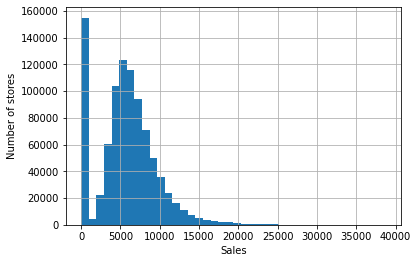

In [8]:
# histogram to evaluate the target distribution

df1['Sales'].hist(bins=40)
plt.ylabel('Number of stores')
plt.xlabel('Sales')
plt.show()

In [9]:
df1['Sales'].describe()

count    914629.000000
mean       5755.722525
std        3842.448149
min           0.000000
25%        3711.000000
50%        5715.000000
75%        7826.000000
max       38722.000000
Name: Sales, dtype: float64

In [10]:
len(df1['Sales'][df1['Sales'] == 0]) / len(df1)

0.1692281788572197

We can see that the target is continuous, and the distribution is skewed to the right <br>
17% of the total rows recorded zero sales

In [11]:
# drop all rows with zero Sales amount
df1 = df1[df1['Sales'] > 0]

print(df1.shape)
df1.head()

(759848, 17)


,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,4,2015-04-30,6228,650,1,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,4,2015-04-30,6884,716,1,1,0,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,4,2015-04-30,9971,979,1,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,2015-04-30,16106,1854,1,1,0,0,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,4,2015-04-30,6598,729,1,1,0,0,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


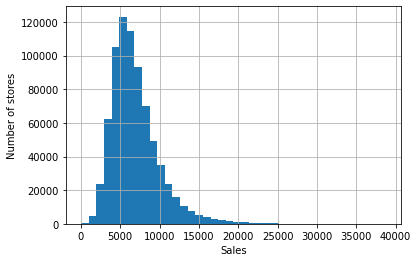

In [12]:
# histogram to evaluate the target distribution

df1['Sales'].hist(bins=40)
plt.ylabel('Number of stores')
plt.xlabel('Sales')
plt.show()

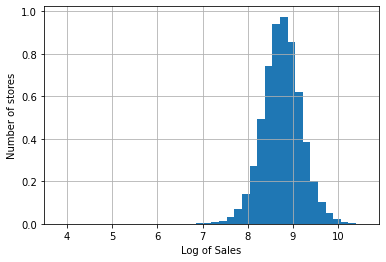

In [13]:
# transform the target using the logarithm

np.log(df1['Sales']).hist(bins=40, density=True)
plt.ylabel('Number of stores')
plt.xlabel('Log of Sales')
plt.show()

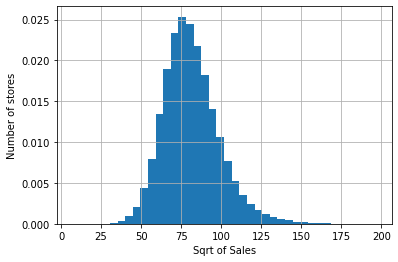

In [14]:
# transform the target using the square root transform

np.sqrt(df1['Sales']).hist(bins=40, density=True)
plt.ylabel('Number of stores')
plt.xlabel('Sqrt of Sales')
plt.show()

Now the distribution looks more Gaussian

### 2. Variable Types

In [15]:
# identify the categorical variables; capture all those with type "object"

cat_vars = [var for var in df1.columns if df1[var].dtype == 'O']
cat_vars

['Date', 'StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759848 entries, 0 to 914610
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   DayOfWeek                  759848 non-null  int64  
 1   Date                       759848 non-null  object 
 2   Sales                      759848 non-null  int64  
 3   Customers                  759848 non-null  int64  
 4   Open                       759848 non-null  int64  
 5   Promo                      759848 non-null  int64  
 6   StateHoliday               759848 non-null  object 
 7   SchoolHoliday              759848 non-null  int64  
 8   StoreType                  759848 non-null  object 
 9   Assortment                 759848 non-null  object 
 10  CompetitionDistance        757889 non-null  float64
 11  CompetitionOpenSinceMonth  518054 non-null  float64
 12  CompetitionOpenSinceYear   518054 non-null  float64
 13  Promo2                     75

In [17]:
#  transform datatype of the variable date to datetime
df1['Date'] = pd.to_datetime( df1[ 'Date' ] )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759848 entries, 0 to 914610
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   DayOfWeek                  759848 non-null  int64         
 1   Date                       759848 non-null  datetime64[ns]
 2   Sales                      759848 non-null  int64         
 3   Customers                  759848 non-null  int64         
 4   Open                       759848 non-null  int64         
 5   Promo                      759848 non-null  int64         
 6   StateHoliday               759848 non-null  object        
 7   SchoolHoliday              759848 non-null  int64         
 8   StoreType                  759848 non-null  object        
 9   Assortment                 759848 non-null  object        
 10  CompetitionDistance        757889 non-null  float64       
 11  CompetitionOpenSinceMonth  518054 non-null  float64 

In [18]:
# identify the categorical variables; capture all those with type "object"

cat_vars = [var for var in df1.columns if df1[var].dtype == 'O']
cat_vars

['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']

In [19]:
# identify all numerical variables
num_vars = [var for var in df1.columns if var not in cat_vars and var != 'Sales']
num_vars

['DayOfWeek',
 'Date',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear']

### 3. Missing values


In [20]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in df1.columns if df1[var].isnull().sum() > 0]
vars_with_na

['CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [21]:
# determine percentage of missing values (expressed as decimals) and display the result ordered by % of missing data
df1[vars_with_na].isnull().mean().sort_values(ascending=False)

Promo2SinceWeek              0.502533
Promo2SinceYear              0.502533
PromoInterval                0.502533
CompetitionOpenSinceMonth    0.318214
CompetitionOpenSinceYear     0.318214
CompetitionDistance          0.002578
dtype: float64

Some of the variables with missing values has atleast 30% to a half of their data missing

In [22]:
# now we can determine which variables, from those with missing data,
# are numerical and which are categorical

cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

print('Number of categorical variables with na: ', len(cat_na))
print('Number of numerical variables with na: ', len(num_na))

Number of categorical variables with na:  1
Number of numerical variables with na:  5


In [23]:
cat_na

['PromoInterval']

In [24]:
num_na

['CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2SinceWeek',
 'Promo2SinceYear']

### Relationship between missing data and Sales
Evaluate the sales of store in those observations where the information is missing. <br>
Do this for each variable that shows missing data

In [25]:
def analyse_na_value(df, var):

    # copy of the dataframe, so that we do not override the original data
    # see the link for more details about pandas.copy()
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html
    df = df.copy()

    # let's make an interim variable that indicates 1 if the
    # observation was missing or 0 otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)

    # let's compare the median SalePrice in the observations where data is missing
    # vs the observations where data is available

    # determine the median price in the groups 1 and 0,
    # and the standard deviation of the sale price,
    # and we capture the results in a temporary dataset
    tmp = df.groupby(var)['Sales'].agg(['mean', 'std'])

    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Sales", color='green')

    plt.show()

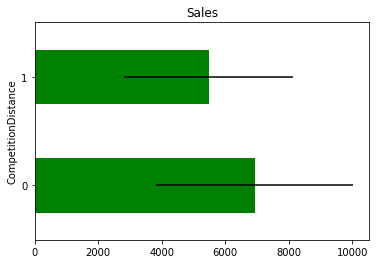

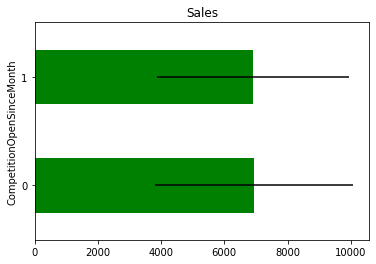

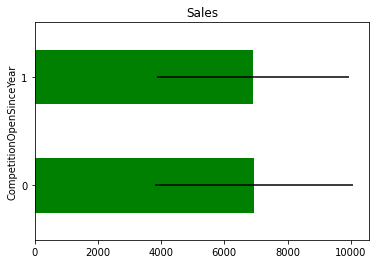

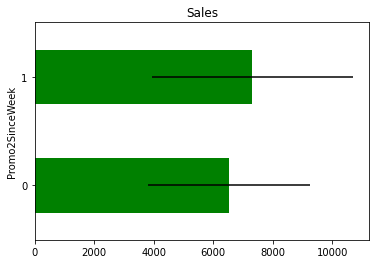

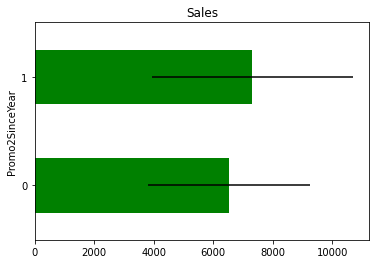

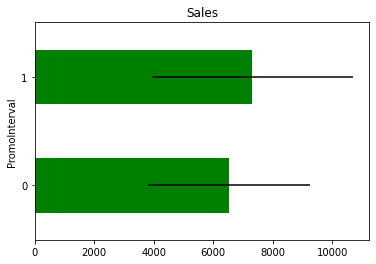

In [26]:
# run the function on each variable with missing data
for var in vars_with_na:
    analyse_na_value(df1, var)

With the exception of CompetitionDistance, there's not much difference in the average Sales of stores where the information is missing from the average Sales of stores where information exists.

### Fillout NA

In [30]:
df1.head()

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,4,2015-04-30,6228,650,1,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,4,2015-04-30,6884,716,1,1,0,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,4,2015-04-30,9971,979,1,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,2015-04-30,16106,1854,1,1,0,0,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,4,2015-04-30,6598,729,1,1,0,0,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [39]:
ave_distance = df1['CompetitionDistance'].mean()
ave_distance

5458.456990403608

In [46]:
# get frequently occurring value
print("Promo2SinceWeek: ", str(df1['Promo2SinceWeek'].mode()))
print("Promo2SinceYear: ", str(df1['Promo2SinceYear'].mode()))

print("CompetitionOpenSinceMonth: ", str(df1['CompetitionOpenSinceMonth'].mode()))
print("CompetitionOpenSinceYear: ", str(df1['CompetitionOpenSinceYear'].mode()))

Promo2SinceWeek:  0    14.0
dtype: float64
Promo2SinceYear:  0    2011.0
dtype: float64
CompetitionOpenSinceMonth:  0    9.0
dtype: float64
CompetitionOpenSinceYear:  0    2013.0
dtype: float64


In [48]:
# # impute missing values
df1['CompetitionDistance'] = df1['CompetitionDistance'].apply(lambda x: ave_distance if math.isnan( x ) else x )

df1['Promo2SinceWeek'] = df1.apply( lambda x: 14.0 if math.isnan( x['Promo2SinceWeek'] ) else x['Promo2SinceWeek'], axis = 1 )
df1['Promo2SinceYear'] = df1.apply( lambda x: 2011.0 if math.isnan( x['Promo2SinceYear'] ) else x['Promo2SinceYear'], axis = 1 )
df1['CompetitionOpenSinceMonth'] = df1.apply( lambda x: 9.0 if math.isnan( x['CompetitionOpenSinceMonth'] ) else x['CompetitionOpenSinceMonth'], axis = 1 )
df1['CompetitionOpenSinceYear'] = df1.apply( lambda x: 2013.0 if math.isnan( x['CompetitionOpenSinceYear'] ) else x['CompetitionOpenSinceYear'], axis = 1 )

df1['PromoInterval'].fillna( 0, inplace = True)

In [49]:
df1.isna().sum()

DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### 4. Numerical variables

In [50]:
print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
df1[num_vars].head()

Number of numerical variables:  12


,DayOfWeek,Date,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,4,2015-04-30,650,1,1,0,1270.0,9.0,2008.0,0,14.0,2011.0
1,4,2015-04-30,716,1,1,0,570.0,11.0,2007.0,1,13.0,2010.0
2,4,2015-04-30,979,1,1,0,14130.0,12.0,2006.0,1,14.0,2011.0
3,4,2015-04-30,1854,1,1,0,620.0,9.0,2009.0,0,14.0,2011.0
4,4,2015-04-30,729,1,1,0,29910.0,4.0,2015.0,0,14.0,2011.0


### Temporal Variables

There are 2 year variables in the dataset:
* CompetitionOpenSinceYear: gives the approximate year of the time the nearest competitor was opened
* Promo2SinceYear: describes the year when the store started participating in Promo2

In [51]:
#  transform datatype of the variable Year variables to int
df1['CompetitionOpenSinceYear'] = df1['CompetitionOpenSinceYear'].astype(np.int64)
df1['Promo2SinceYear'] = df1['Promo2SinceYear'].astype(np.int64)

In [52]:
# list of variables that contain year information

year_vars = [var for var in num_vars if 'Year' in var]
year_vars

['CompetitionOpenSinceYear', 'Promo2SinceYear']

In [53]:
# explore the values of these temporal variables

for var in year_vars:
    print(var, df1[var].unique())
    print()

CompetitionOpenSinceYear [2008 2007 2006 2009 2015 2013 2014 2000 2011 2010 2005 1999 2003 2012
 2004 2002 1961 1995 2001 1990 1994 1900 1998]

Promo2SinceYear [2011 2010 2012 2009 2014 2015 2013]



Text(0, 0.5, 'Median Store Sales')

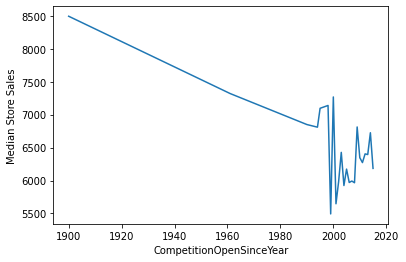

In [54]:
# plot median store sales vs year in which the nearest competitor was opened
df1.groupby('CompetitionOpenSinceYear')['Sales'].median().plot()
plt.ylabel('Median Store Sales')

Text(0, 0.5, 'Median Store Sales')

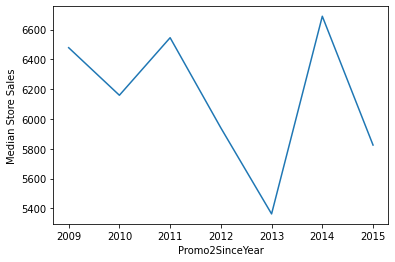

In [55]:
# plot median store sales vs year in which a store started participating in Promo2
df1.groupby('Promo2SinceYear')['Sales'].median().plot()
plt.ylabel('Median Store Sales')

### Discrete Variables

In [56]:
# list of discrete variables
discrete_vars = [var for var in num_vars if len(
    df1[var].unique()) < 100 and var not in year_vars]


print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  7


In [57]:
df1[discrete_vars].head()

,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionOpenSinceMonth,Promo2,Promo2SinceWeek
0,4,1,1,0,9.0,0,14.0
1,4,1,1,0,11.0,1,13.0
2,4,1,1,0,12.0,1,14.0
3,4,1,1,0,9.0,0,14.0
4,4,1,1,0,4.0,0,14.0


<AxesSubplot:xlabel='Promo2', ylabel='Sales'>

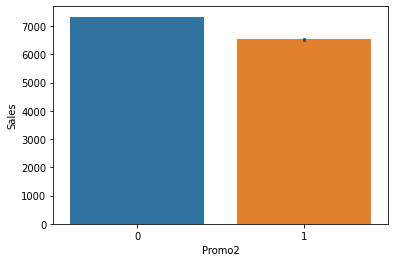

In [58]:
sns.barplot(x='Promo2', y='Sales', data=df1)

There's not much difference on the sales generated from stores who participated in continuing and consecutive promotions from those who did not participated

Text(0, 0.5, 'Median Store Sales')

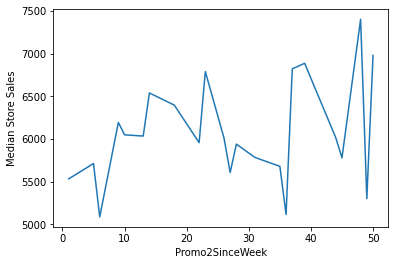

In [59]:
# plot median store sales vs week in a year
df1.groupby('Promo2SinceWeek')['Sales'].median().plot()
plt.ylabel('Median Store Sales')

However, it is also interesting to note that there's tend to increase in sales in the later part of the year (up to Christmas and New Year) for stores who participated in continuing and consecutive promotions

<AxesSubplot:xlabel='Promo', ylabel='Sales'>

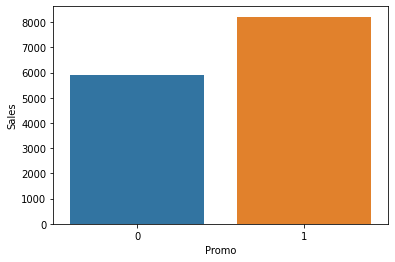

In [60]:
sns.barplot(x='Promo', y='Sales', data=df1)

In general, stores that runs a promo on a specific day tends to have an increased in Sales than those who did not

### Continuous Variables
We will consider continuous variables to all those that are not temporal or discrete

In [61]:
# make list of continuous variables
cont_vars = [
    var for var in num_vars if var not in discrete_vars+year_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  3


In [62]:
df1[cont_vars].head()

,Date,Customers,CompetitionDistance
0,2015-04-30,650,1270.0
1,2015-04-30,716,570.0
2,2015-04-30,979,14130.0
3,2015-04-30,1854,620.0
4,2015-04-30,729,29910.0


<AxesSubplot:xlabel='Customers', ylabel='Sales'>

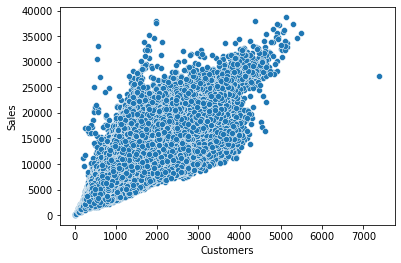

In [81]:
sns.scatterplot(data=df1, x="Customers", y="Sales")

Sales is highly correlated to number of Customers.

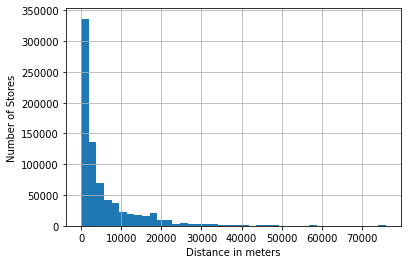

In [63]:
df1['CompetitionDistance'].hist(bins=40)
plt.ylabel('Number of Stores')
plt.xlabel('Distance in meters')
plt.show()

In [64]:
df1['CompetitionDistance'].describe()

count    759848.000000
mean       5458.456990
std        7799.840347
min          20.000000
25%         710.000000
50%        2330.000000
75%        6880.000000
max       75860.000000
Name: CompetitionDistance, dtype: float64

We can see that most of the stores have their competition within 5km range. <br>
However, the variable is not normally distributed

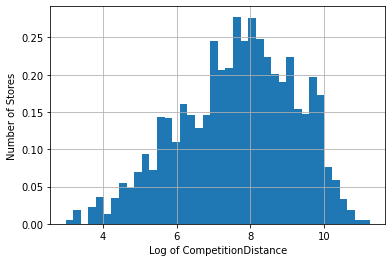

In [65]:
# transform the variable using the log transform

np.log(df1['CompetitionDistance']).hist(bins=40, density=True)
plt.ylabel('Number of Stores')
plt.xlabel('Log of CompetitionDistance')
plt.show()

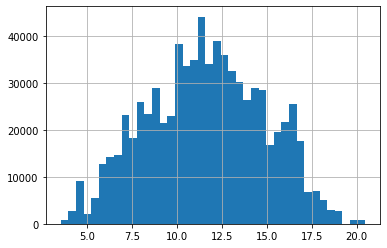

In [66]:
# apply Yeo-Johnson transformation

# temporary copy of the data
tmp = df1.copy()
# transform the variable - yeo-johsnon
tmp['CompetitionDistance'], param = stats.yeojohnson(df1['CompetitionDistance'])
# plot the histograms of the transformed variables
tmp['CompetitionDistance'].hist(bins=40)
plt.show()

The values seem to be spread more evenly in the range than the log transformed values <br>
Whether this helps improve the predictive power, remains to be seen. <br>
To determine if this is the case, we should train a model with the original values and one with the transformed values (Log and Yeo-Johnson), and determine model performance, and feature importance. 


### 5. Categorical variables


In [67]:
print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  4


In [68]:
df1[cat_vars].head()

,StateHoliday,StoreType,Assortment,PromoInterval
0,0,c,a,0
1,0,a,a,"Jan,Apr,Jul,Oct"
2,0,a,a,"Jan,Apr,Jul,Oct"
3,0,c,c,0
4,0,a,a,0


### Number of lables: cardinality
Evaluate how many different categories are present in each of the variables


<AxesSubplot:>

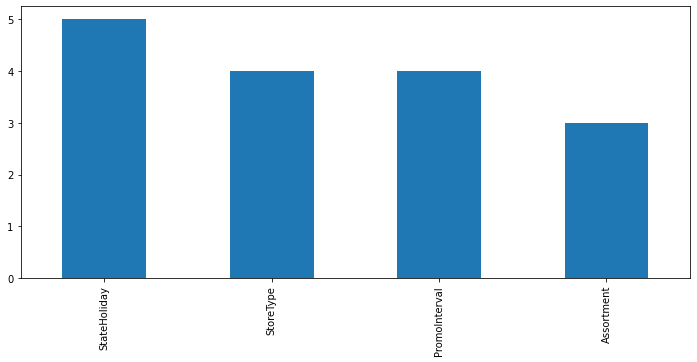

In [69]:
# count unique categories with pandas unique() 
# and then plot them in descending order

df1[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

All the categorical variables show low cardinality, this means that they have only few different labels

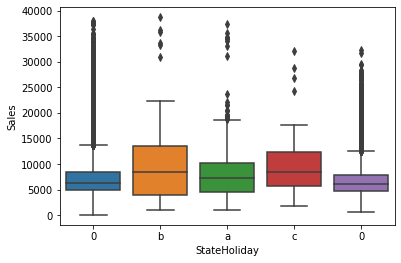

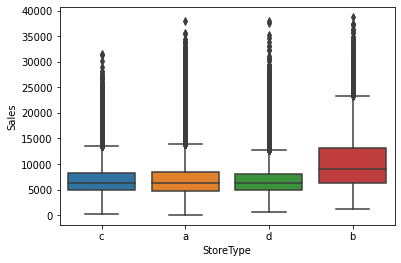

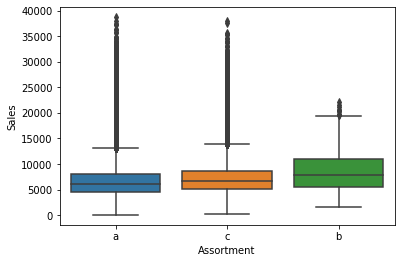

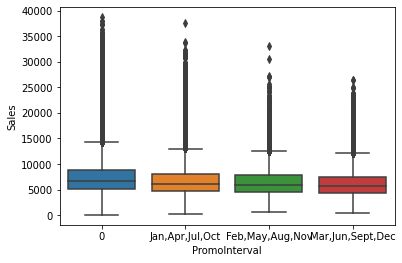

In [77]:
for var in cat_vars:
    sns.boxplot(x=var, y= 'Sales', data=df1)
    plt.show()

<AxesSubplot:xlabel='StoreType', ylabel='Customers'>

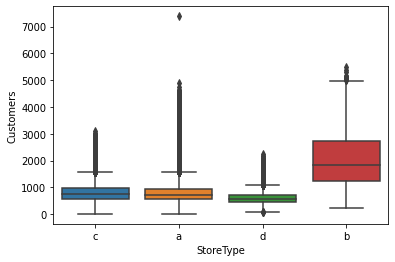

In [80]:
sns.boxplot(x="StoreType", y= 'Customers', data=df1)

The most selling and crowded store type is b

## Conclusions of the EDA:
* Sales is highly correlated to number of Customers.
* There's not much difference on the sales generated from stores who participated in continuing and consecutive promotions from those who did not participated;
* However, it is also interesting to note that there's tend to increase in sales in the later part of the year (up to Christmas and New Year) for stores who participated in continuing and consecutive promotions.
* In general, stores that runs a promo on a specific day tends to have an increased in Sales than those who did not.
* Most of the stores have their competition within 5km range.
* The most selling and crowded store type is b
<br>
<br>
*Disclaimer:*
There is certainly more that can be done to understand the nature of this data and the relationship of these variables with the target, Sales. And also about the distribution of the variables themselves.